# Checking and playing with NICER data
Looking through and plotting segment information

In [20]:
import numpy as np
from astropy.table import Table, Column, unique
import os
# import subprocess
from astropy.io import fits
# from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import ScalarFormatter, NullFormatter
import matplotlib.gridspec as gridspec
from matplotlib.colors import cnames as mcolors
from matplotlib._color_data import XKCD_COLORS as xkcdcolor
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
font_prop = font_manager.FontProperties(size=20)
%matplotlib inline

In [2]:
homedir = os.path.expanduser("~")
maxi_dir = homedir + "/Dropbox/Research/MAXIJ1535_B-QPO"

In [4]:
seg_info_file = maxi_dir+"/out/MAXIJ1535_seg-info.dat"
seg_tab = Table.read(seg_info_file, format='ascii', 
                     names=('obsID', 'start_time', 'end_time', 
                            'total_rate', 'broad_rate', 'rms', 
                            'hard_rate', 'soft_rate', 'hr', 
                            'nz_rate', 'ibg_rate', 'hrej_rate'))

In [33]:
short_time_tab = seg_tab[0:1768]
soft_segs_mask = (short_time_tab['rms'] <= 0.041) & (short_time_tab['hr'] <= 0.031) & (short_time_tab['hr'] >= 0.021)
soft_segs = short_time_tab[soft_segs_mask]
hard_segs_mask = (short_time_tab['rms'] <= 0.041) & (short_time_tab['hr'] >= 0.031) & (short_time_tab['hr'] <= 0.050)
hard_segs = short_time_tab[hard_segs_mask]

/anaconda3/envs/maxij1535/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


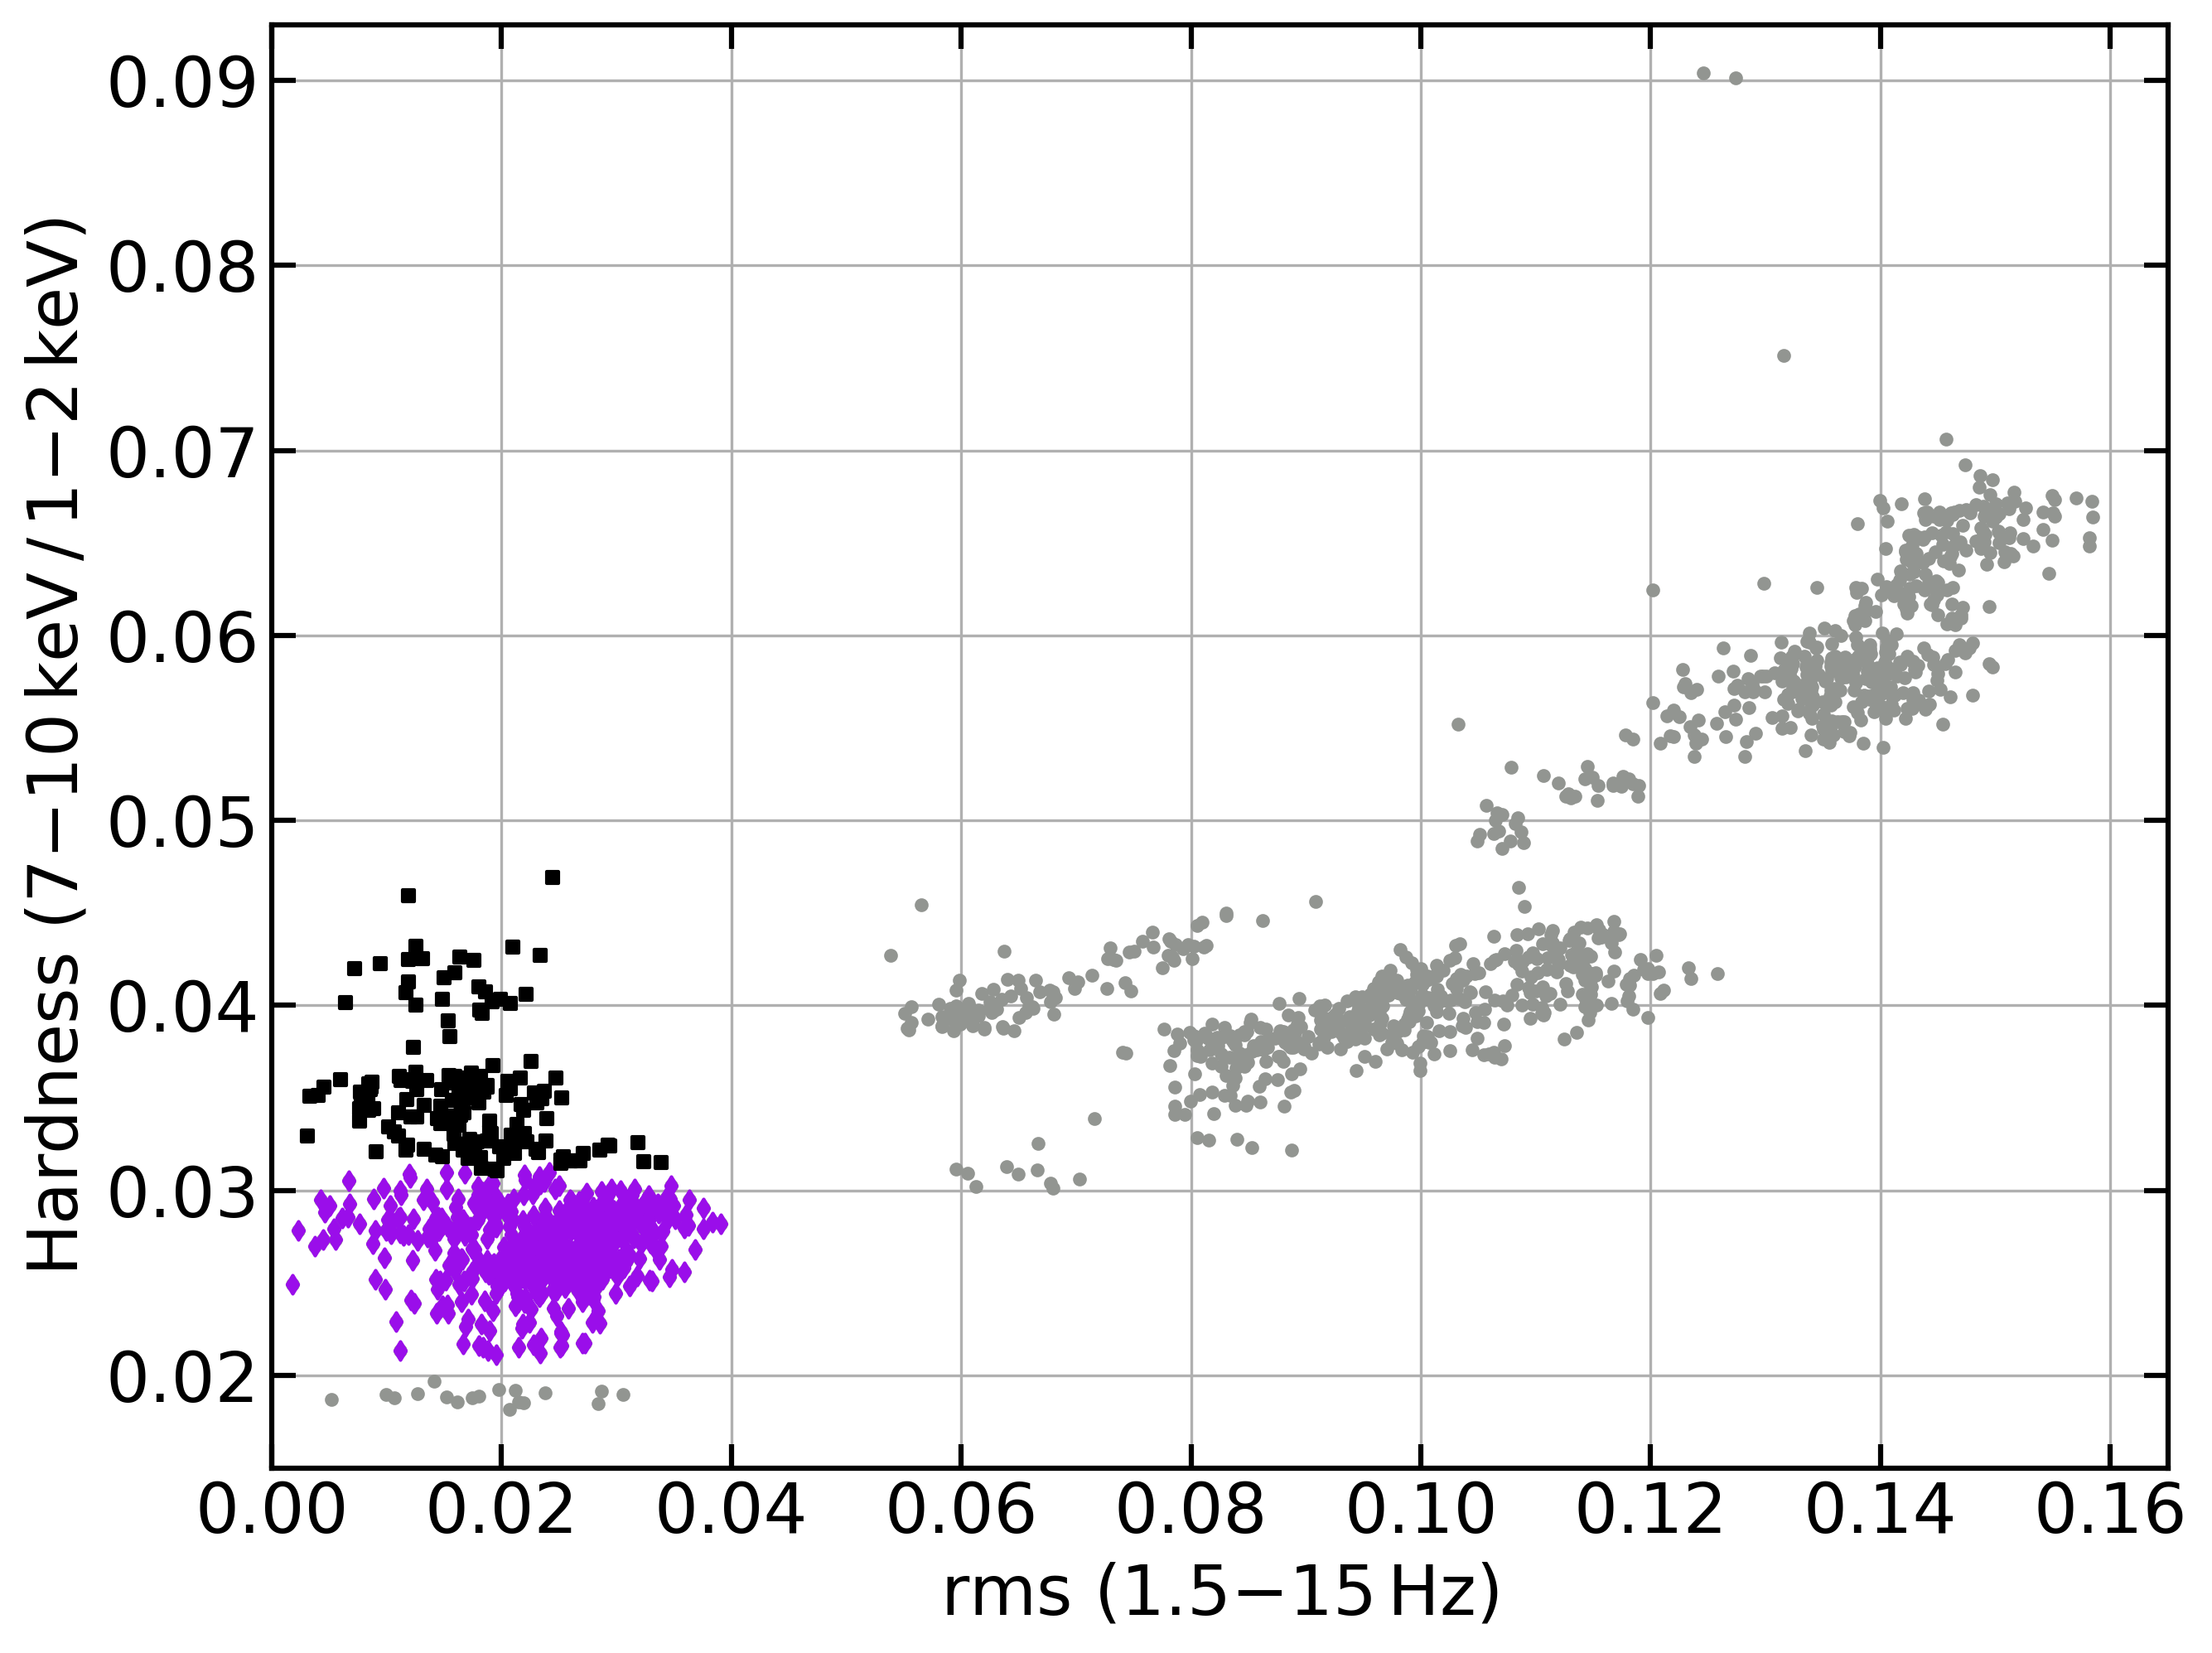

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(9, 6.75), dpi=300, tight_layout=True)
# rect = patches.Rectangle((0.0, 0.021), 0.041, 0.010,
#                     facecolor="black", ec="none", alpha=0.3)
# ax.add_patch(rect)
ax.scatter(short_time_tab['rms'], short_time_tab['hr'], marker='.', color=xkcdcolor['xkcd:grey'])
ax.scatter(soft_segs['rms'], soft_segs['hr'], marker='d', s=14, color=xkcdcolor['xkcd:violet'])
ax.scatter(hard_segs['rms'], hard_segs['hr'], marker='s', s=12, color=xkcdcolor['xkcd:black'])
# ax.hlines(0.021, 0.0, 0.165, lw=2, color='black', linestyle='--')
# ax.hlines(0.031, 0.0, 0.165, lw=2, color='black', linestyle='--')
# ax.vlines(0.041, 0.015, 0.1, lw=2, color='black', linestyle='-.')
ax.set_xlim(0, 0.165)
ax.set_ylim(0.015, 0.093)
ax.set_xlabel(r"rms (1.5$-$15$\,$Hz)", fontproperties=font_prop)
ax.set_ylabel(r"Hardness (7$-$10$\,$keV$\,/\,$1$-$2$\,$keV)", fontproperties=font_prop)
ax.tick_params(axis='x', labelsize=20, bottom=True, top=True,
                labelbottom=True, labeltop=False, direction="in")
ax.tick_params(axis='y', labelsize=20, left=True, right=True,
                labelleft=True, labelright=False, direction="in")
ax.tick_params(which='major', width=1.5, length=7, direction="in")
ax.tick_params(which='minor', width=1.5, length=4, direction="in")
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='major')
ax.set_axisbelow(True)
plt.savefig("./out/rms-hr.eps")
plt.savefig("./final_plots/rms-hr.eps")
# plt.savefig("./out/rms-hr.png")
# plt.savefig("./final_plots/rms-hr.png")
plt.show()

In [10]:
sept1 = 115689602  # seconds since 2014-01-01T00:00:00 UTC including 2 leap seconds
times = seg_tab['start_time'] - sept1
times /= (60*60*24)  # now it's in days since Sept 1 00:00:00 UTC
print(times[0])
print(times[1768])

11.457222223116464
40.48357638888889


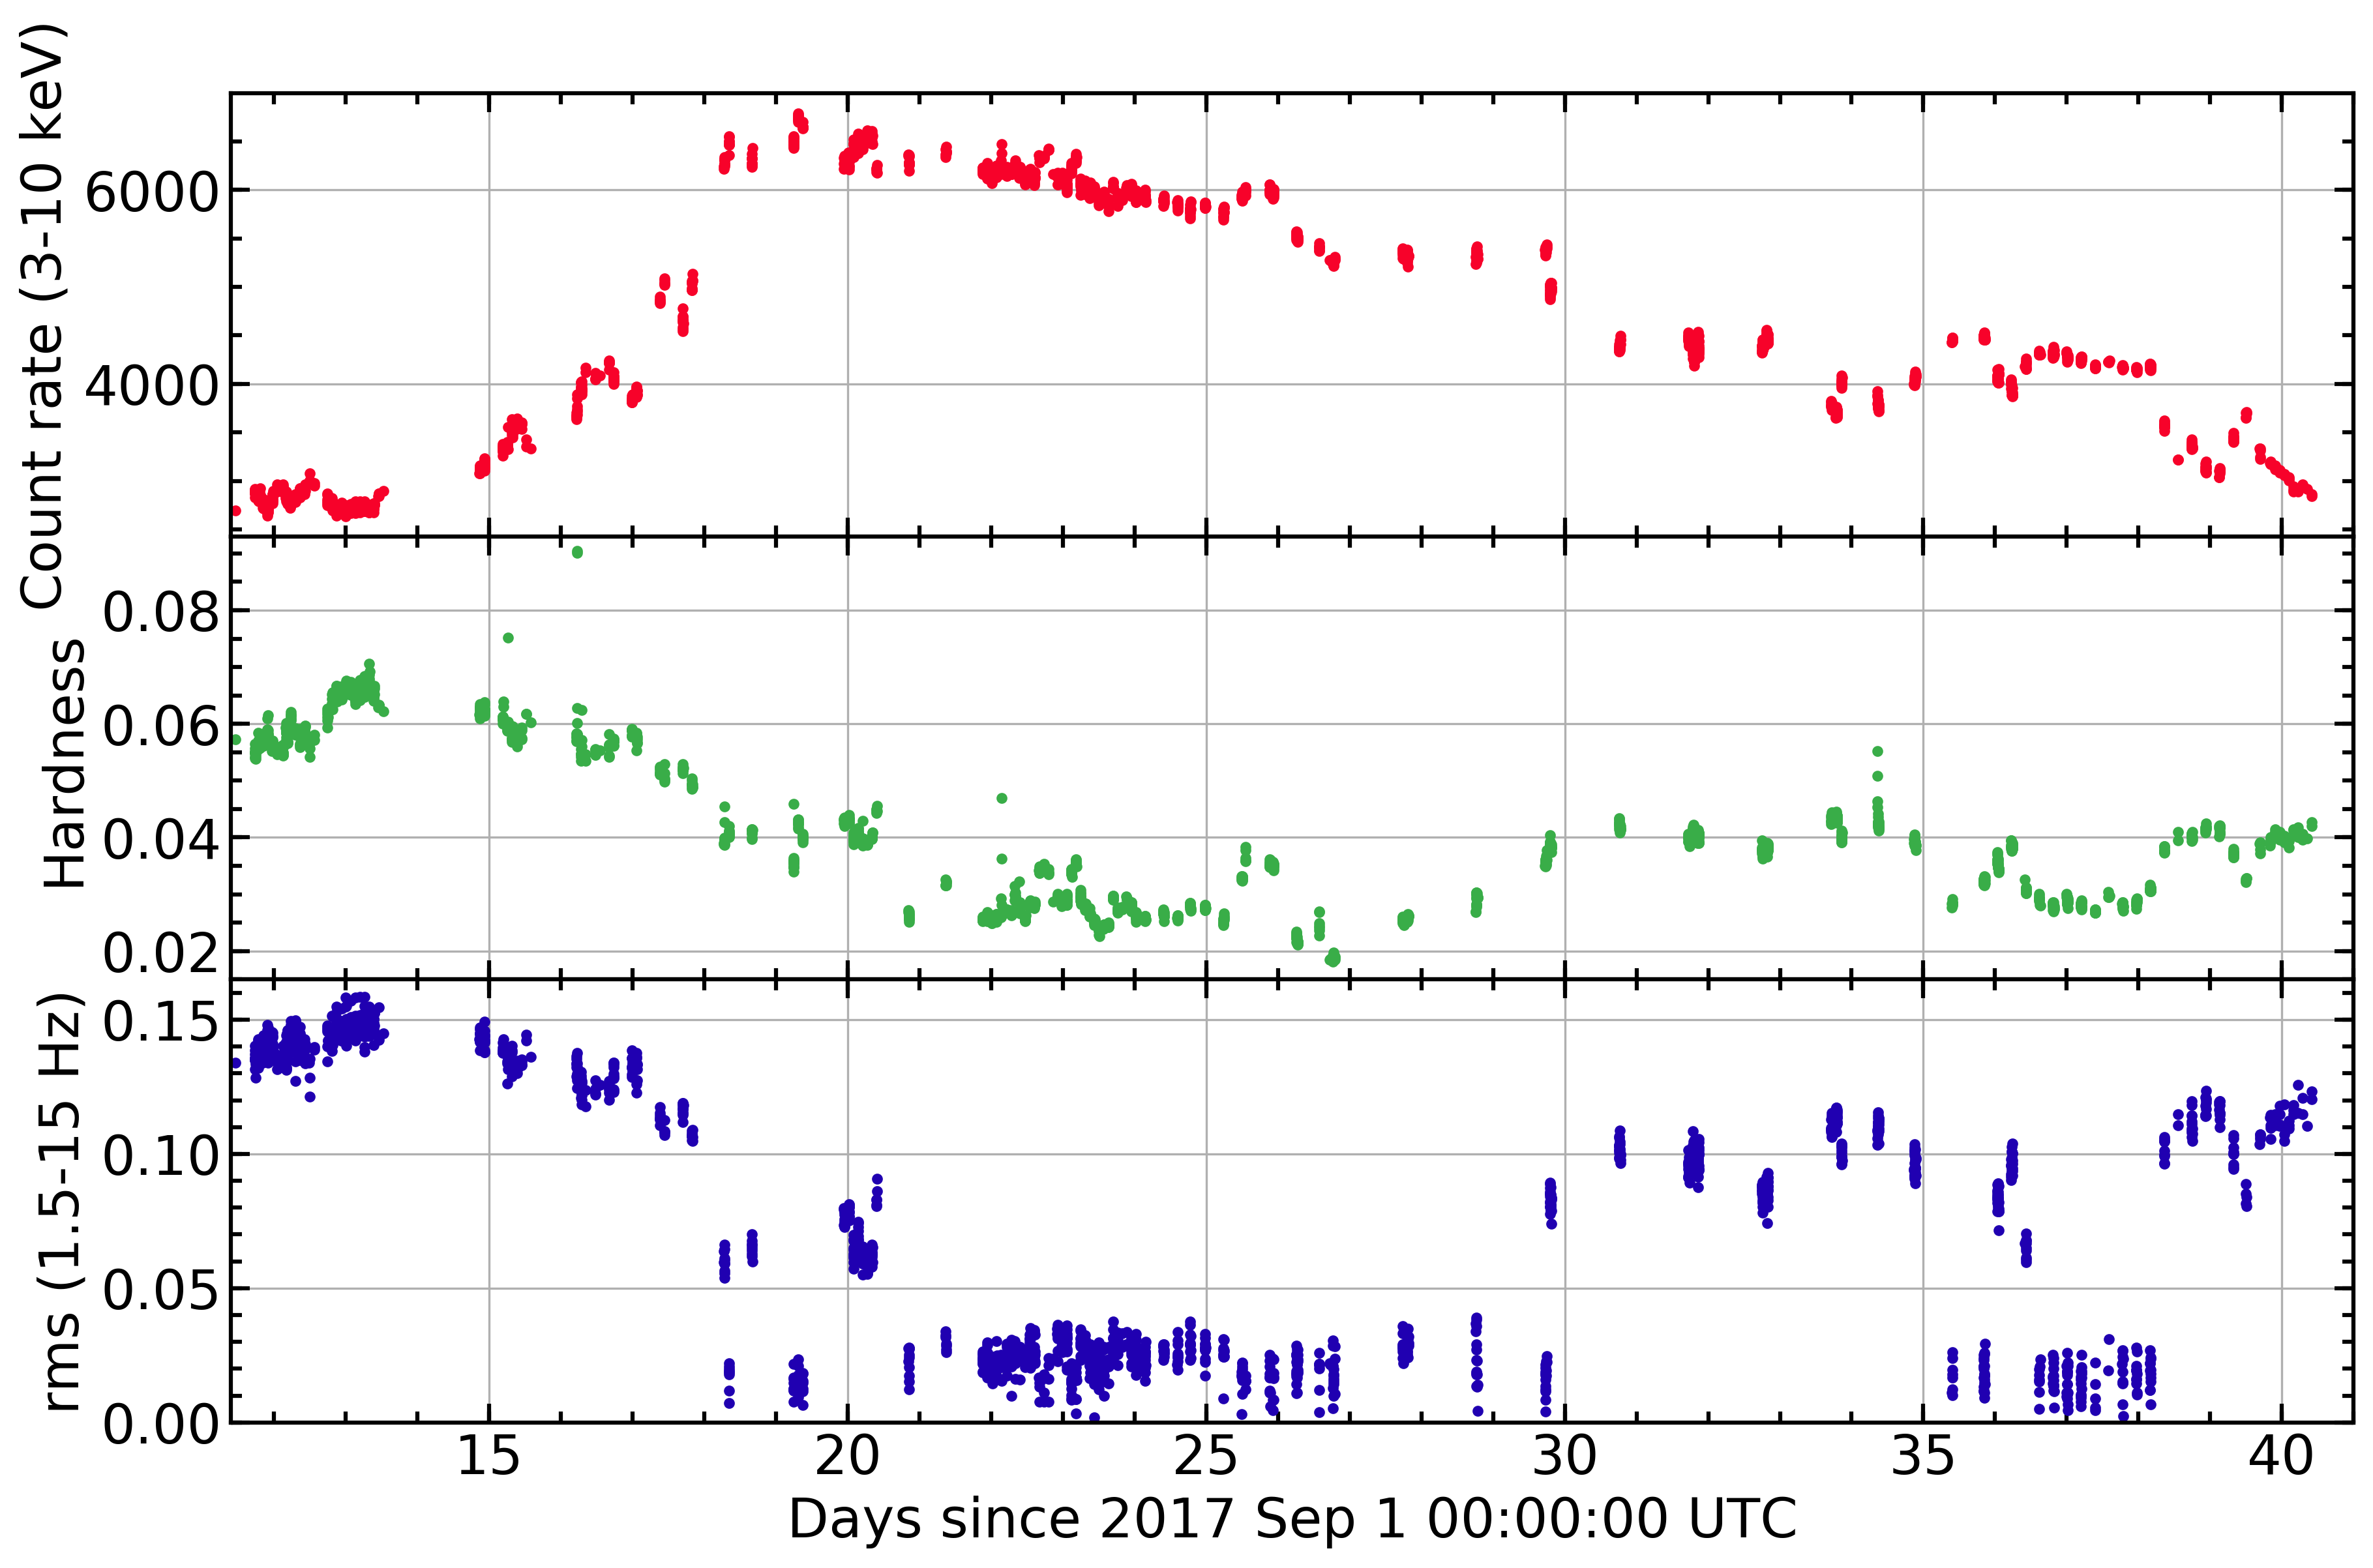

In [29]:
fig = plt.figure(figsize=(14, 9), dpi=300)
gs1 = gridspec.GridSpec(3, 1)
gs1.update(wspace=0.025, hspace=0.0)

ax1 = plt.subplot(gs1[0])
ax1.scatter(times[0:1768], seg_tab['broad_rate'][0:1768], marker='.', color=xkcdcolor['xkcd:cherry red'])
ax1.set_ylabel("Count rate (3-10 keV)", fontproperties=font_prop)
ax1.set_xlim(11.4,41)
# ax1.set_ylim(0.00, 0.17)
ax1.tick_params(axis='x', labelsize=20, bottom=True, top=True,
                labelbottom=False, labeltop=False, direction="in")
ax1.tick_params(axis='y', labelsize=20, left=True, right=True,
                labelleft=True, labelright=False, direction="in")
ax1.tick_params(which='major', width=1.5, length=7, direction="in")
ax1.tick_params(which='minor', width=1.5, length=4, direction="in")
ax1.xaxis.set_major_formatter(ScalarFormatter())
ax1.xaxis.set_minor_formatter(NullFormatter())
ax1.xaxis.set_ticks_position('both')
ax1.yaxis.set_minor_locator(MultipleLocator(500))
ax1.yaxis.set_ticks_position('both')
for axis in ['top', 'bottom', 'left', 'right']:
    ax1.spines[axis].set_linewidth(1.5)
ax1.xaxis.grid(True, which='major')
ax1.yaxis.grid(True, which='major')
ax1.set_axisbelow(True)

ax2 = plt.subplot(gs1[1], sharex=ax1)
ax2.scatter(times[0:1768], seg_tab['hr'][0:1768], marker='.', color=xkcdcolor['xkcd:medium green'])
ax2.set_ylabel("Hardness", fontproperties=font_prop)
ax1.set_xlim(11.4,41)
ax2.set_ylim(0.015, 0.093)
ax2.tick_params(axis='x', labelsize=20, bottom=True, top=True,
                labelbottom=False, labeltop=False, direction="in")
ax2.tick_params(axis='y', labelsize=20, left=True, right=True,
                labelleft=True, labelright=False, direction="in")
ax2.tick_params(which='major', width=1.5, length=7, direction="in")
ax2.tick_params(which='minor', width=1.5, length=4, direction="in")
ax2.xaxis.set_major_formatter(ScalarFormatter())
ax2.xaxis.set_minor_formatter(NullFormatter())
ax2.xaxis.set_ticks_position('both')
ax2.yaxis.set_minor_locator(MultipleLocator(0.005))
ax2.yaxis.set_ticks_position('both')
for axis in ['top', 'bottom', 'left', 'right']:
    ax2.spines[axis].set_linewidth(1.5)
ax2.xaxis.grid(True, which='major')
ax2.yaxis.grid(True, which='major')
ax2.set_axisbelow(True)

ax3 = plt.subplot(gs1[2], sharex=ax1)
ax3.scatter(times[0:1768], seg_tab['rms'][0:1768], marker='.', color=xkcdcolor['xkcd:ultramarine'])
ax3.set_xlabel("Days since 2017 Sep 1 00:00:00 UTC", fontproperties=font_prop)
ax3.set_ylabel("rms (1.5-15 Hz)", fontproperties=font_prop)
ax1.set_xlim(11.4,41)
ax3.set_ylim(0.00, 0.165)
ax3.tick_params(axis='x', labelsize=20, bottom=True, top=True,
                labelbottom=True, labeltop=False, direction="in")
ax3.tick_params(axis='y', labelsize=20, left=True, right=True,
                labelleft=True, labelright=False, direction="in")
ax3.tick_params(which='major', width=1.5, length=7, direction="in")
ax3.tick_params(which='minor', width=1.5, length=4, direction="in")
ax3.xaxis.set_minor_locator(MultipleLocator(1))
ax3.xaxis.set_major_formatter(ScalarFormatter())
ax3.xaxis.set_minor_formatter(NullFormatter())
ax3.xaxis.set_ticks_position('both')
ax3.yaxis.set_minor_locator(MultipleLocator(0.01))
ax3.yaxis.set_ticks_position('both')
for axis in ['top', 'bottom', 'left', 'right']:
    ax3.spines[axis].set_linewidth(1.5)
ax3.xaxis.grid(True, which='major')
ax3.yaxis.grid(True, which='major')
ax3.set_axisbelow(True)

plt.savefig("./out/outburst_lightcurves.eps")
plt.savefig("./final_plots/outburst_lightcurves.eps")
plt.show()

In [23]:
print(seg_tab['start_time'][1746:1750])

 start_time
-----------
119137353.0
119137417.0
119142765.0
119142829.0


In [24]:
## Filtering seg_tab
time_mask = seg_tab['start_time'] <= 119138417.0
filt_tab = seg_tab[time_mask]
# print(filt_tab)
# hr_mask = (filt_tab['hr'] < 0.031) & (filt_tab['hr'] > 0.021)
hr_mask = (filt_tab['hr'] > 0.031) & (filt_tab['hr'] < 0.05)
filt_tab = filt_tab[hr_mask]
# print(filt_tab)
rms_mask = filt_tab['rms'] < 0.041
filt_tab = filt_tab[rms_mask]
print(filt_tab)

  obsID        start_time          end_time      ... nz_rate  ibg_rate hrej_rate
---------- ------------------ ------------------ ... -------- -------- ---------
1050360104 116679506.00007726 116679570.00007726 ... 0.703125      0.0   0.15625
1050360104        116703322.0        116703386.0 ... 0.765625      0.0   0.15625
1050360104        116703386.0        116703450.0 ...  0.40625      0.0   0.03125
1050360104        116703450.0        116703514.0 ... 0.328125      0.0   0.03125
1050360104        116703514.0        116703578.0 ...  0.34375      0.0    0.0625
1050360104        116703578.0        116703642.0 ... 0.515625      0.0    0.0625
1050360104        116703642.0        116703706.0 ...    0.375      0.0    0.0625
1050360104        116703706.0        116703770.0 ...  0.21875      0.0  0.109375
1050360104        116703770.0        116703834.0 ... 0.390625      0.0    0.0625
1050360104        116703834.0        116703898.0 ...    0.375      0.0  0.078125
       ...                ..

In [25]:
good_obsIDs = unique(filt_tab, keys='obsID')['obsID']
print(len(good_obsIDs))
print(good_obsIDs)

9
  obsID   
----------
1050360111
1050360112
1050360114
1050360115
1050360116
1050360118
1130360103
1130360109
1130360112
